In [43]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
import warnings
import sklearn
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")
%matplotlib inline

In [44]:
gdp = pd.read_csv('RealGDP.csv')

In [45]:
gdp.head()

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8


Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. Specifically generate the following things:

Plot the time series, along with any logical or necessary differences to get a stationary dataset

Generate and interpret a PACF for the time series (and/or its differences)

Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

Text(0.5, 1.0, 'Real GDP vs. Time')

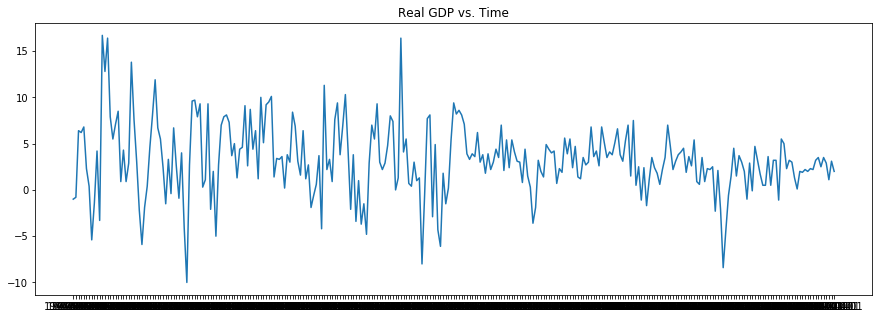

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(gdp.DATE, gdp.A191RL1Q225SBEA)
plt.title('Real GDP vs. Time')

In [47]:
from statsmodels.tsa.stattools import acf, pacf

Text(0.5, 1.0, 'AR(1) PACF')

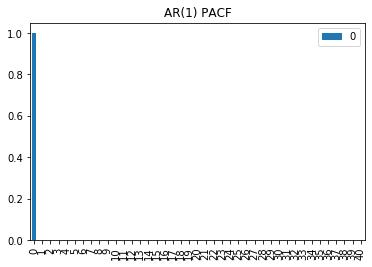

In [48]:
gdp['diff_1'] = gdp.A191RL1Q225SBEA - gdp.A191RL1Q225SBEA.shift()

y = gdp['diff_1'] 

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(pacf(y))
x_acf.plot(kind='bar')
plt.title("AR(1) PACF")

Text(0.5, 1.0, 'MA(1) PACF')

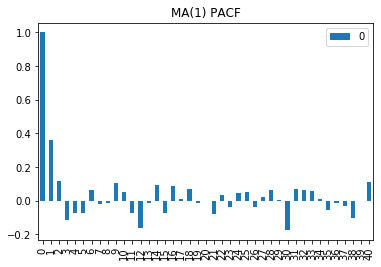

In [49]:
x_acf = pd.DataFrame(pacf(gdp.A191RL1Q225SBEA))
x_acf.plot(kind='bar')
plt.title('MA(1) PACF')

In [50]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -831.881
Method:                           css   S.D. of innovations              4.347
Date:                Mon, 25 Nov 2019   AIC                           1667.762
Time:                        01:15:30   BIC                           1675.088
Sample:                             1   HQIC                          1670.698
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.256      0.041      0.968      -0.492       0.512
Residuals Description
count    2.880000e+02
mean    -1.372359e-16
std      4.354792e+00
min     -1.231042e+01
25%     -2.835417e+00

In [51]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:        A191RL1Q225SBEA   No. Observations:                  289
Model:                     ARMA(1, 0)   Log Likelihood                -778.920
Method:                       css-mle   S.D. of innovations              3.582
Date:                Mon, 25 Nov 2019   AIC                           1563.840
Time:                        01:15:31   BIC                           1574.839
Sample:                             0   HQIC                          1568.247
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.2023      0.328      9.753      0.000       2.559       3.846
ar.L1.A191RL1Q225SBEA     0.3594      0.055      6.549      0.000       0.252       0.467
        

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:        A191RL1Q225SBEA   No. Observations:                  289
Model:                     ARMA(1, 1)   Log Likelihood                -777.809
Method:                       css-mle   S.D. of innovations              3.569
Date:                Mon, 25 Nov 2019   AIC                           1563.618
Time:                        01:15:32   BIC                           1578.284
Sample:                             0   HQIC                          1569.495
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.1981      0.356      8.979      0.000       2.500       3.896
ar.L1.A191RL1Q225SBEA     0.5157      0.104      4.948      0.000       0.311       0.720
ma.L1.A1

In [53]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(gdp.A191RL1Q225SBEA, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -777.145
Method:                       css-mle   S.D. of innovations              3.564
Date:                Mon, 25 Nov 2019   AIC                           1562.290
Time:                        01:15:32   BIC                           1576.942
Sample:                             1   HQIC                          1568.162
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0077      0.004     -2.022      0.044      -0.015      -0.000
ar.L1.D.A191RL1Q225SBEA     0.3443      0.056      6.182      0.000       0.235       0.453


In [60]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -774.302
Method:                       css-mle   S.D. of innovations              3.530
Date:                Mon, 25 Nov 2019   AIC                           1560.603
Time:                        01:20:26   BIC                           1582.581
Sample:                             1   HQIC                          1569.411
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.847      0.066      -0.016       0.000
ar.L1.D.A191RL1Q225SBEA    -0.2589      0.272     -0.952      0.342      -0.792       0.274


The ARIMA model with order 2,1,2 is the best model as the AIC score is the Lowest.

In [55]:
series = gdp['A191RL1Q225SBEA']
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, sqrt(best_score)))

In [56]:
p_values = [0, 1, 2]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=6.339
ARIMA(0, 0, 1) MSE=5.563
ARIMA(0, 0, 2) MSE=5.095
ARIMA(0, 1, 0) MSE=7.051
ARIMA(0, 1, 1) MSE=5.692
ARIMA(0, 1, 2) MSE=5.019
ARIMA(0, 2, 0) MSE=20.973
ARIMA(0, 2, 1) MSE=7.116
ARIMA(1, 0, 0) MSE=5.152
ARIMA(1, 0, 1) MSE=4.998
ARIMA(1, 0, 2) MSE=4.965
ARIMA(1, 1, 0) MSE=5.499
ARIMA(1, 1, 1) MSE=4.803
ARIMA(1, 2, 0) MSE=11.076
ARIMA(2, 0, 0) MSE=4.910
ARIMA(2, 0, 1) MSE=4.951
ARIMA(2, 0, 2) MSE=5.158
ARIMA(2, 1, 0) MSE=5.352
ARIMA(2, 1, 1) MSE=4.646
ARIMA(2, 1, 2) MSE=4.669
ARIMA(2, 2, 0) MSE=8.824
Best ARIMA(2, 1, 1) RMSE=2.155


In [61]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -775.540
Method:                       css-mle   S.D. of innovations              3.546
Date:                Mon, 25 Nov 2019   AIC                           1561.080
Time:                        01:20:42   BIC                           1579.395
Sample:                             1   HQIC                          1568.420
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.784      0.075      -0.016       0.001
ar.L1.D.A191RL1Q225SBEA     0.3094      0.059      5.268      0.000       0.194       0.424
